In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam, SGD

In [2]:
#Convert date
def to_datetime(df):
    date = datetime.strptime(df, '%d.%m.%Y')
    return date.strftime("%Y-%m-%d")

In [5]:
df = pd.read_csv('Tesla_Stock.csv')
#df['Date'] = df['Date'].apply(lambda x: to_datetime(x))
#df = df.sort_values('Date').reset_index(drop=True)
df.head()

,Date,Open,High,Low,Close,Volume
0,2012-01-03,28.94,29.50,27.65,28.08,928052
1,2012-01-04,28.21,28.67,27.50,27.71,630036
2,2012-01-05,27.76,27.93,26.85,27.12,1005432
3,2012-01-06,27.20,27.79,26.41,26.89,687081
4,2012-01-09,27.00,27.49,26.12,27.25,896951


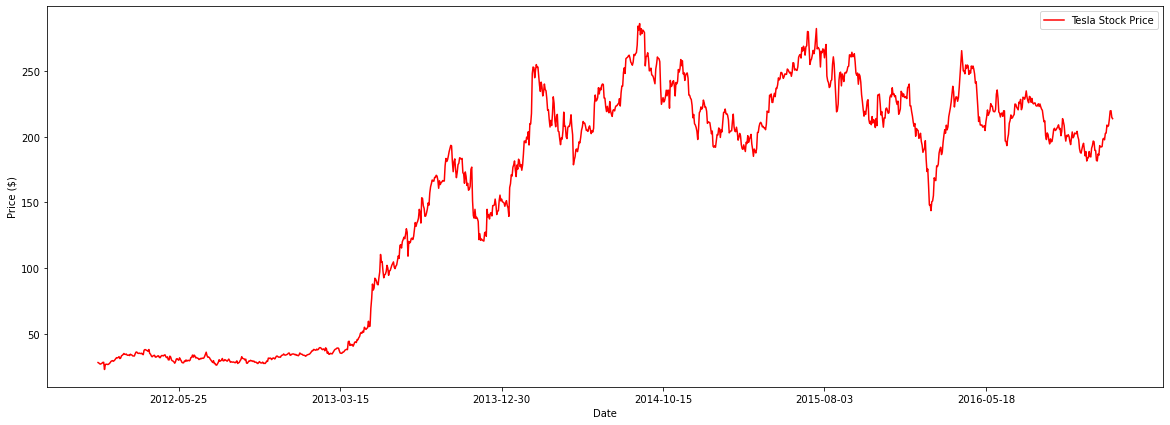

In [6]:
df['Price'] = df['Close'].astype(float)

plt.figure(figsize=(20,7))
plt.plot(df['Date'].values, df['Price'].values, label = 'Tesla Stock Price', color = 'red')
plt.xticks(np.arange(100,df.shape[0],200))
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

<h3>Data Preprocessing</h3>

In [8]:
df.shape[0]

1258

In [9]:
num_shape = 1258

train = df.iloc[:num_shape, 1:2].values
test = df.iloc[num_shape:, 1:2].values

In [10]:
sc = MinMaxScaler(feature_range = (0, 1))
train_scaled = sc.fit_transform(train)

In [11]:
X_train = []

#Price on next day
y_train = []

window = 60

for i in range(window, num_shape):
    X_train_ = np.reshape(train_scaled[i-window:i, 0], (window, 1))
    X_train.append(X_train_)
    y_train.append(train_scaled[i, 0])
X_train = np.stack(X_train)
y_train = np.stack(y_train)

<h2>RNNs</h2>

<h3>LSTM</h3>

In [14]:
# REWRITE FOR GPU OR YOUR CPU WILL JUST BURN OUT

# Initializing the Recurrent Neural Network
model = Sequential()
#Adding the first LSTM layer with a sigmoid activation function and some Dropout regularization
#Units - dimensionality of the output space

model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50))
model.add(Dropout(0.2))

# Adding the output layer
model.add(Dense(units = 1))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            10400     
_________________________________________________________________
dropout (Dropout)            (None, 60, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                2

In [15]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train, y_train, epochs = 1000, batch_size = 32);

Epoch 1/1000
38/38 [==============================] - 2s 61ms/step - loss: 0.0776
Epoch 2/1000
38/38 [==============================] - 2s 58ms/step - loss: 0.0098: 0s - loss: 0.0
Epoch 3/1000
38/38 [==============================] - 2s 56ms/step - loss: 0.0090
Epoch 4/1000
38/38 [==============================] - 2s 57ms/step - loss: 0.0075
Epoch 5/1000
38/38 [==============================] - 2s 55ms/step - loss: 0.0068
Epoch 6/1000
38/38 [==============================] - 2s 54ms/step - loss: 0.0071
Epoch 7/1000
38/38 [==============================] - 2s 55ms/step - loss: 0.0064
Epoch 8/1000
38/38 [==============================] - 2s 55ms/step - loss: 0.0066
Epoch 9/1000
38/38 [==============================] - 2s 55ms/step - loss: 0.0069
Epoch 10/1000
38/38 [==============================] - 2s 55ms/step - loss: 0.0069
Epoch 11/1000
38/38 [==============================] - 2s 55ms/step - loss: 0.0059
Epoch 12/1000
38/38 [==============================] - 2s 57ms/step - loss: 0.00

38/38 [==============================] - 2s 60ms/step - loss: 0.0021
Epoch 100/1000
38/38 [==============================] - 2s 60ms/step - loss: 0.0021
Epoch 101/1000
38/38 [==============================] - 2s 62ms/step - loss: 0.0018
Epoch 102/1000
38/38 [==============================] - 2s 63ms/step - loss: 0.0020
Epoch 103/1000
38/38 [==============================] - 2s 57ms/step - loss: 0.0017
Epoch 104/1000
38/38 [==============================] - 2s 54ms/step - loss: 0.0018
Epoch 105/1000
38/38 [==============================] - 2s 57ms/step - loss: 0.0020
Epoch 106/1000
38/38 [==============================] - 2s 61ms/step - loss: 0.0019
Epoch 107/1000
38/38 [==============================] - 2s 60ms/step - loss: 0.0020
Epoch 108/1000
38/38 [==============================] - 2s 58ms/step - loss: 0.0018
Epoch 109/1000
38/38 [==============================] - 2s 57ms/step - loss: 0.0021
Epoch 110/1000
38/38 [==============================] - 2s 55ms/step - loss: 0.0015
Epoch 1

38/38 [==============================] - 2s 56ms/step - loss: 0.0013
Epoch 197/1000
38/38 [==============================] - 2s 55ms/step - loss: 0.0014
Epoch 198/1000
38/38 [==============================] - 2s 56ms/step - loss: 0.0014
Epoch 199/1000
38/38 [==============================] - 2s 57ms/step - loss: 0.0014
Epoch 200/1000
38/38 [==============================] - 2s 56ms/step - loss: 0.0015
Epoch 201/1000
38/38 [==============================] - 2s 55ms/step - loss: 0.0013
Epoch 202/1000
38/38 [==============================] - 2s 58ms/step - loss: 0.0013
Epoch 203/1000
38/38 [==============================] - 2s 58ms/step - loss: 0.0013
Epoch 204/1000
38/38 [==============================] - 2s 57ms/step - loss: 0.0014
Epoch 205/1000
38/38 [==============================] - 2s 56ms/step - loss: 0.0014
Epoch 206/1000
38/38 [==============================] - 2s 59ms/step - loss: 0.0014
Epoch 207/1000
38/38 [==============================] - 2s 57ms/step - loss: 0.0014
Epoch 2

KeyboardInterrupt: 

<h4>Prediction</h4>

In [ ]:
df_volume = np.vstack((train, test))

inputs = df_volume[df_volume.shape[0] - test.shape[0] - window:]
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

num_2 = df_volume.shape[0] - num_shape + window

X_test = []

for i in range(window, num_2):
    X_test_ = np.reshape(inputs[i-window:i, 0], (window, 1))
    X_test.append(X_test_)
    
X_test = np.stack(X_test)

In [ ]:
predict = model.predict(X_test)
predict = sc.inverse_transform(predict)

In [ ]:
diff = predict - test

print("MSE:", np.mean(diff**2))
print("MAE:", np.mean(abs(diff)))
print("RMSE:", np.sqrt(np.mean(diff**2)))

In [ ]:
plt.figure(figsize=(20,7))
plt.plot(df['Date'].values[1200:], df_volume[1200:], color = 'red', label = 'Real Tesla Stock Price')
plt.plot(df['Date'][-predict.shape[0]:].values, predict, color = 'blue', label = 'Predicted Tesla Stock Price')
plt.xticks(np.arange(100,df[1200:].shape[0],200))
plt.title('Tesla Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

<h4>20-days Prediction</h4>

In [ ]:
pred_ = predict[-1].copy()
prediction_full = []
window = 60
df_copy = df.iloc[:, 1:2][1:].values

for j in range(20):
    df_ = np.vstack((df_copy, pred_))
    train_ = df_[:num_shape]
    test_ = df_[num_shape:]
    
    df_volume_ = np.vstack((train_, test_))

    inputs_ = df_volume_[df_volume_.shape[0] - test_.shape[0] - window:]
    inputs_ = inputs_.reshape(-1,1)
    inputs_ = sc.transform(inputs_)

    X_test_2 = []

    for k in range(window, num_2):
        X_test_3 = np.reshape(inputs_[k-window:k, 0], (window, 1))
        X_test_2.append(X_test_3)

    X_test_ = np.stack(X_test_2)
    predict_ = model.predict(X_test_)
    pred_ = sc.inverse_transform(predict_)
    prediction_full.append(pred_[-1][0])
    df_copy = df_[j:]

In [ ]:
prediction_full_new = np.vstack((predict, np.array(prediction_full).reshape(-1,1)))

In [ ]:
df_date = df[['Date']]

for h in range(20):
    df_date_add = pd.to_datetime(df_date['Date'].iloc[-1]) + pd.DateOffset(days=1)
    df_date_add = pd.DataFrame([df_date_add.strftime("%Y-%m-%d")], columns=['Date'])
    df_date = df_date.append(df_date_add)
df_date = df_date.reset_index(drop=True)

In [ ]:
# CHANGE THE RANGES

plt.figure(figsize=(20,7))
plt.plot(df['Date'].values[1700:], df_volume[1700:], color = 'red', label = 'Real Tesla Stock Price')
plt.plot(df_date['Date'][-prediction_full_new.shape[0]:].values, prediction_full_new, color = 'blue', label = 'Predicted Tesla Stock Price')
plt.xticks(np.arange(100,df[1700:].shape[0],200))
plt.title('Tesla Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

<h2>GRU</h2>

In [ ]:
# The GRU architecture
modelGRU = Sequential()

modelGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
modelGRU.add(Dropout(0.2))

modelGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
modelGRU.add(Dropout(0.2))

modelGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
modelGRU.add(Dropout(0.2))

modelGRU.add(GRU(units=50))
modelGRU.add(Dropout(0.2))

modelGRU.add(Dense(units=1))
modelGRU.summary()

In [ ]:
modelGRU.compile(optimizer='sgd', loss='mean_squared_error')
modelGRU.fit(X_train, y_train, epochs=1000, batch_size=16)

In [ ]:
predict = modelGRU.predict(X_test)
predict = sc.inverse_transform(predict)

In [ ]:
diff = predict - test

print("MSE:", np.mean(diff**2))
print("MAE:", np.mean(abs(diff)))
print("RMSE:", np.sqrt(np.mean(diff**2)))

In [ ]:
plt.figure(figsize=(20,7))
plt.plot(df['Date'].values[1800:], df_volume[1800:], color = 'red', label = 'Real Tesla Stock Price')
plt.plot(df['Date'][-predict.shape[0]:].values, predict, color = 'blue', label = 'Predicted Tesla Stock Price')
plt.xticks(np.arange(100,df[1800:].shape[0],20))
plt.title('Tesla Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

<h4>20-days Prediction</h4>

In [ ]:
pred_ = predict[-1].copy()
prediction_full = []
window = 60
df_copy = df.iloc[:, 1:2][1:].values

for j in range(20):
    df_ = np.vstack((df_copy, pred_))
    train_ = df_[:num_shape]
    test_ = df_[num_shape:]
    
    df_volume_ = np.vstack((train_, test_))

    inputs_ = df_volume_[df_volume_.shape[0] - test_.shape[0] - window:]
    inputs_ = inputs_.reshape(-1,1)
    inputs_ = sc.transform(inputs_)

    X_test_2 = []

    for k in range(window, num_2):
        X_test_3 = np.reshape(inputs_[k-window:k, 0], (window, 1))
        X_test_2.append(X_test_3)

    X_test_ = np.stack(X_test_2)
    predict_ = modelGRU.predict(X_test_)
    pred_ = sc.inverse_transform(predict_)
    prediction_full.append(pred_[-1][0])
    df_copy = df_[j:]


In [ ]:
prediction_full_new = np.vstack((predict, np.array(prediction_full).reshape(-1,1)))

df_date = df[['Date']]

for h in range(20):
    kk = pd.to_datetime(df_date['Date'].iloc[-1]) + pd.DateOffset(days=1)
    kk = pd.DataFrame([kk.strftime("%Y-%m-%d")], columns=['Date'])
    df_date = df_date.append(kk)
df_date = df_date.reset_index(drop=True)

In [ ]:
# CHANGE THE DATA RANGES

plt.figure(figsize=(20,7))
plt.plot(df['Date'].values[1700:], df_volume[1700:], color = 'red', label = 'Real Tesla Stock Price')
plt.plot(df_date['Date'][-prediction_full_new.shape[0]:].values, prediction_full_new, color = 'blue', label = 'Predicted Tesla Stock Price')
plt.xticks(np.arange(100,df_date[1700:].shape[0],20))
plt.title('Tesla Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()